<a href="https://colab.research.google.com/github/febri009/NLP-submission/blob/main/NLP_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submission NLP - Belajar Pengembangan Machine Learning**

> Nama: Febriyanti Paramudita


> Email: muditafebriyanti@gmail.com


> Asal: Purwokerto



# **Impor Library dan Mengubah Dataset Menjadi Dataframe**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
df = pd.read_csv('drive/MyDrive/twitter.csv')
print(f'Jumlah datasets: {len(df)}')

Jumlah datasets: 74682


# **Menampilkan 5 sampel teratas pada dataset menggunakan fungsi head()**

In [ ]:
df.head()

,value,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


# **Cek Info Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   74682 non-null  object
 1   text    73996 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


# **Menghitung Nilai Dataset Value**

In [ ]:
df.value.value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: value, dtype: int64

# **One-hot-encoding dan membuat dataframe baru**

In [ ]:
category = pd.get_dummies(df.value)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='value', axis=1)
df_baru

,text,Irrelevant,Negative,Neutral,Positive
0,im getting on borderlands and i will murder yo...,0,0,0,1
1,I am coming to the borders and I will kill you...,0,0,0,1
2,im getting on borderlands and i will kill you ...,0,0,0,1
3,im coming on borderlands and i will murder you...,0,0,0,1
4,im getting on borderlands 2 and i will murder ...,0,0,0,1
...,...,...,...,...,...
74677,Just realized that the Windows partition of my...,0,0,0,1
74678,Just realized that my Mac window partition is ...,0,0,0,1
74679,Just realized the windows partition of my Mac ...,0,0,0,1
74680,Just realized between the windows partition of...,0,0,0,1


# **Mengubah nilai-nilai dataframe ke dalam tipe data numpy array**

In [ ]:
text = df_baru['text'].values
label = df_baru[['Irrelevant', 'Negative', 'Neutral', 'Positive']].values

# **Membagi data training dan testing**

In [ ]:
text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size = 0.2, random_state=42, shuffle= True)

# **Menggunakan fungsi Tokenizer**

In [ ]:
text_latih = [str(item) for item in text_latih]
text_test = [str(item) for item in text_test]

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

## **Arsitektur Model**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=8),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

#label_latih_onehot = to_categorical(label_latih.argmax(axis=1), num_classes=4)
#label_test_onehot = to_categorical(label_test.argmax(axis=1), num_classes=4)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           40000     
                                                                 
 dropout_6 (Dropout)         (None, None, 8)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                18688     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

# **Callback**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy has reached > 90%!")
callbacks = myCallback()

# **Training model**

In [ ]:
history = model.fit(padded_latih, label_latih, epochs=50, batch_size=64,
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=callbacks)

Epoch 1/50
934/934 - 111s - loss: 0.4935 - accuracy: 0.8036 - val_loss: 0.5362 - val_accuracy: 0.8007 - 111s/epoch - 118ms/step
Epoch 2/50
934/934 - 110s - loss: 0.4903 - accuracy: 0.8065 - val_loss: 0.5220 - val_accuracy: 0.8051 - 110s/epoch - 117ms/step
Epoch 3/50
934/934 - 109s - loss: 0.4844 - accuracy: 0.8093 - val_loss: 0.5169 - val_accuracy: 0.8056 - 109s/epoch - 116ms/step
Epoch 4/50
934/934 - 109s - loss: 0.4853 - accuracy: 0.8091 - val_loss: 0.5219 - val_accuracy: 0.8056 - 109s/epoch - 117ms/step
Epoch 5/50
934/934 - 107s - loss: 0.4811 - accuracy: 0.8069 - val_loss: 0.5234 - val_accuracy: 0.8073 - 107s/epoch - 114ms/step
Epoch 6/50
934/934 - 110s - loss: 0.4806 - accuracy: 0.8101 - val_loss: 0.5174 - val_accuracy: 0.8085 - 110s/epoch - 118ms/step
Epoch 7/50
934/934 - 110s - loss: 0.4769 - accuracy: 0.8105 - val_loss: 0.5148 - val_accuracy: 0.8109 - 110s/epoch - 117ms/step
Epoch 8/50
934/934 - 114s - loss: 0.4745 - accuracy: 0.8115 - val_loss: 0.5166 - val_accuracy: 0.8087 - 

# **Evaluasi Model**

In [ ]:
model.evaluate(padded_test, label_test)

467/467 [==============================] - 13s 28ms/step - loss: 0.5278 - accuracy: 0.8025


[0.5278318524360657, 0.8025038242340088]

# **Plot Loss**

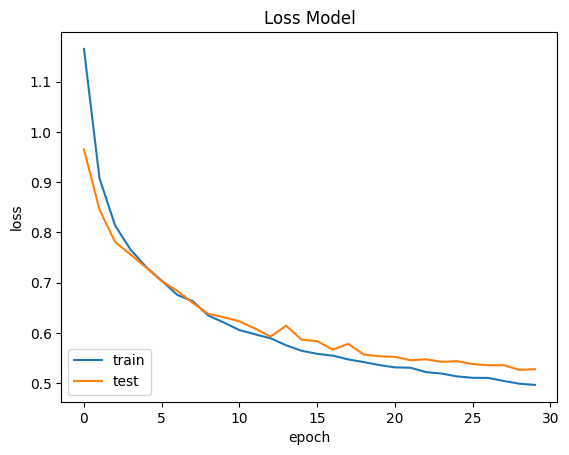

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

# **Plot Accuracy**

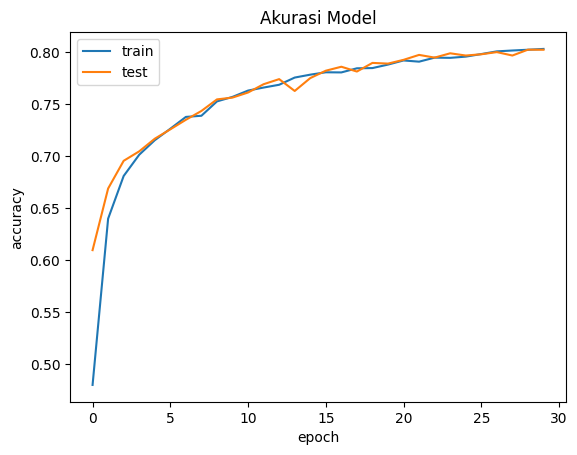

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()